In [186]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as LA
#np.set_printoptions(precision=3)
plt.rcParams['figure.figsize'] = (12.0, 8.0)

### Fourier methods: The Gaussian wavepacket

In [187]:
from math import pi
PIN = 165
xw = 1.6 * 2
kw = (6.4 + 3.2*PIN/300.0) / 1
L = 10
N = 512
kw

8.16

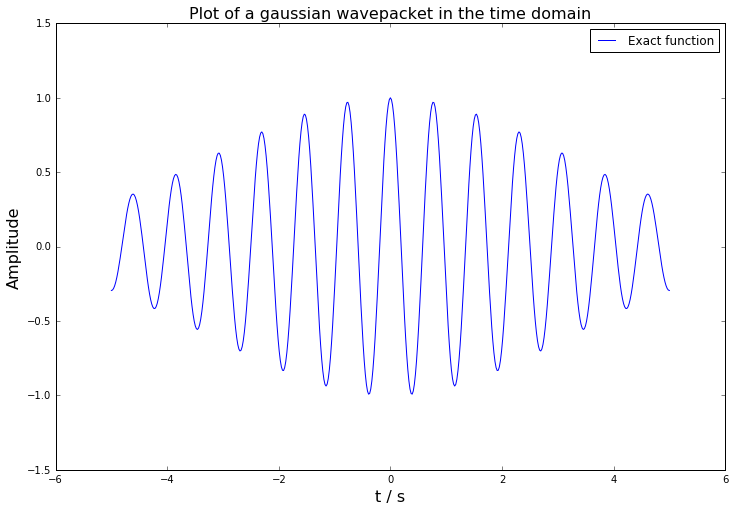

In [188]:
xn = np.linspace(-L/2, L/2, N + 1) #N+1 equally spaced sampling points

def f(x):
    return np.exp(-x**2 / (2*xw**2) ) * np.cos(kw * x)

fn = f(xn)
exact = plt.plot(xn, fn)
plt.title("Plot of a gaussian wavepacket in the time domain", fontsize = 16)
plt.xlabel("t / s", fontsize = 16)
plt.ylabel("Amplitude", fontsize = 16)
plt.xlim(-6,6)
plt.ylim(-1.5, 1.5)
plt.legend(["Exact function"])

(8.1681408993334621, 8.16, 0.49983036672254749, 0.625)

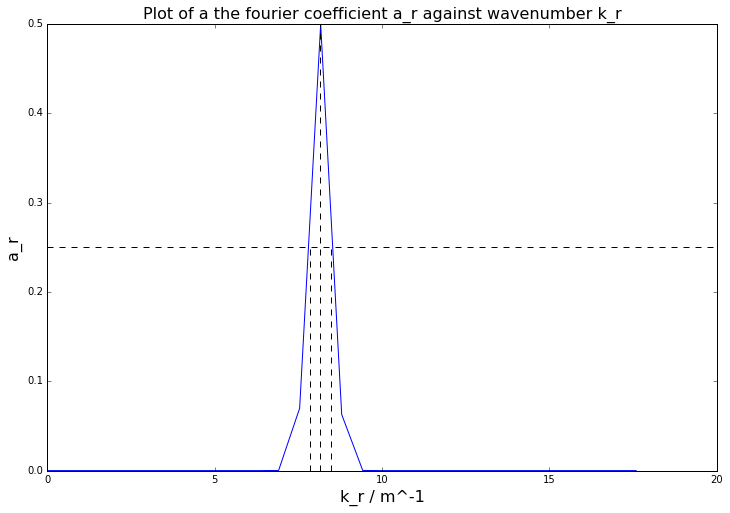

In [189]:
def a(kr):
    ap = kw + kr
    am = kw - kr
    return 1/2 * (np.exp(-ap**2 * xw **2 / 2) + np.exp(-am**2 * xw **2 / 2))
                  
r = np.arange(29)
kr = 2*pi*r/L

plt.plot(kr, a(kr))
plt.plot([kw, kw], [0,0.5], "--k")
plt.plot([0, 20], [0.25,0.25], "--k")
dk = 1 / xw
plt.plot([kw+dk, kw+dk], [0,0.25], "--k")
plt.plot([kw-dk, kw-dk], [0,0.25], "--k")
plt.title("Plot of a the fourier coefficient a_r against wavenumber k_r", fontsize = 16)
plt.xlabel("k_r / m^-1", fontsize = 16)
plt.ylabel("a_r", fontsize = 16)
plt.xlim(0,20)
plt.ylim(0, 0.5)
kr[13], kw, a(kr[13]), 2/ xw

largest mag of delta f:  0.367239405721


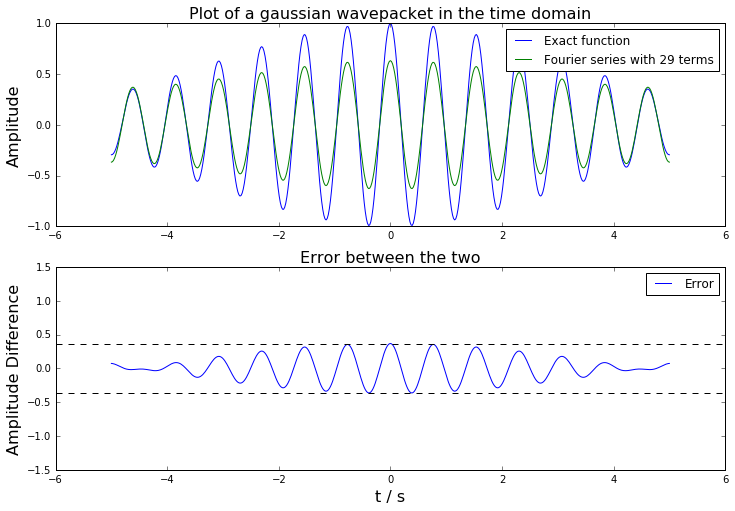

In [190]:
@np.vectorize
def f_from_fourier(x, a, n):
    kr = 2*pi/L * np.arange(1,n)
    return a(0)/2.0 + sum(a(kr)*np.cos(kr*x))


f_f = f_from_fourier(xn, a, 29)

f, (main, sub) = plt.subplots(2)
exact = main.plot(xn, fn)
fourier = main.plot(xn, f_f)
delta = sub.plot(xn, fn - f_f)

main.set_title("Plot of a gaussian wavepacket in the time domain", fontsize = 16)
sub.set_title("Error between the two", fontsize = 16)
plt.xlabel("t / s", fontsize = 16)
main.set_ylabel("Amplitude", fontsize = 16)
sub.set_ylabel("Amplitude Difference", fontsize = 16)
sub.plot((-6,6), (max(fn - f_f),max(fn - f_f)), "--k")
sub.plot((-6,6), (min(fn - f_f),min(fn - f_f)), "--k")

plt.xlim(-6,6)
plt.ylim(-1.5, 1.5)
main.legend(["Exact function", "Fourier series with 29 terms"])
sub.legend(["Error"])
print("largest mag of delta f: ", max(abs(fn - f_f)))